# CRAFT BEER DATASET ANALYSIS
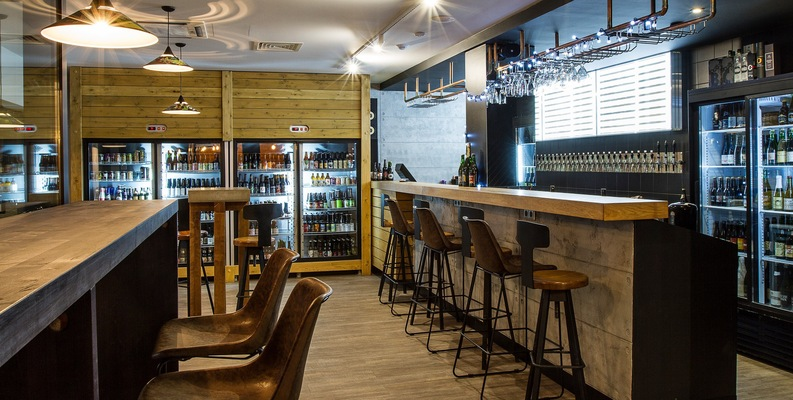

#Introduction

Craft beer bars have become increasingly popular in recent years, providing customers with a wide range of unique and flavorful beer options. However, with so much competition in the market, it is important for craft beer bars to understand and optimize their sales strategies in order to stay profitable and competitive. 



The Nelson Sauvin Bar dataset consists of two files representing the products sold and the sales transactions from the bar. The data can be utilized to evaluate the performance of the bar and improve its overall performance. By analyzing the data, insights gained can be used to identify trends and patterns in customer behaviour and make informed decisions about products to stock and seasonal sales and discount decisions.

 

For this data, we intend to use the insights gained to optimize sales strategies. Thus our analysis will show:


*   Frequently purchased beer products to allow the bar to make data-driven decisions on which products to keep in stock.

*   Sales revenue by volume and country of origin to show which country that manufactures the beer that generates the most sales for the bar and help the bar to know which suppliers to continue working.

*   Trends and patterns in customer behaviour and allow the bar to adopt strategies to improve sales.
*   Relationships between variables such as total sales and alcohol volume. 

# Data Loading, Cleaning and Processing

I analysed two files that are located in the dropbox:

Product_range.csv: This file provides information about the products sold in the bar such as manufacturers, country of origin, beer type, size, alcohol volume and retail price. The file can be read from this address: https:www.dropbox.com/s/2r6krcpi7m5nasf/Product_range.csv?raw=1  

Transactions.csv: This file provides information on the profit made by the business, discount offers, percentage markups and other sales related factors. The file can be read from this address: https://www.dropbox.com/s/7st8gfgbmtoo5f2/Transactions.csv?raw=1





This dataset was sourced from kaggle (https://www.kaggle.com/datasets/podsyp/sales-in-craft-beer-bar)

# libary used
In this Notebook I used Pandas to process the dataset and Plotly Express, to produce the visualisations. Other packages are also used for analysis are stated below.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display_html
#from matplotlib import dates as mpl_dates

#To display tables side by side when needed
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)


# Exploring the Datasets

Product Data:

*   Product_code: Key for transactions merge
*   Vendor_code: Manufacturer's name
*   Name: Product Name
*   Retail_price: Catalog price of product
*   Base_unit: Unit of measurement for the product
*   Country of origin: Country were beer was produced
*   Size: Size of product
*   ABV: Alcohol content by volume

Transaction Data:

*   Date and time of unloading: Date and time when the cash register was unloaded
*   Product code: Key for product range merge
*   Amount: Number of units sold
*  Sale amount: Total amount sold
*   Discount amount: Amount deducted from original amount
*   Profit: Difference between cost price and selling price
*   Percentage markup: Amount by which the cost of a product is increased to determine the sales price.
*   Discount percentage:Percentage discount applied to product.















***Run the code cells to load the datasets into variables and print as pandas data frame:***

In [ ]:
product=pd.read_csv('https://www.dropbox.com/s/2r6krcpi7m5nasf/Product_range.csv?raw=1')
product

In [ ]:
transactions=pd.read_csv('https://www.dropbox.com/s/7st8gfgbmtoo5f2/Transactions.csv?raw=1')
transactions

*Merge the two dataframes into a single dataframe on the product code column and arrange in descending order.*

In [ ]:
beers = pd.merge(transactions, product, on='Product_code', how='inner')
beers = beers.sort_index(ascending=False)
beers.reset_index(drop=True, inplace=True)

beers

*Check for missing values in each column of the merged dataset.*

In [ ]:
beers.isna().sum()

In [ ]:
#replacing wrongly imputed observations where base_unit was  kilogram instead of pieces
beers.loc[beers['Base_unit'] == 'Kilogram', 'Base_unit'] = 'Pieces'
beers


*Fill null values with NaN values as understood by Pandas* 

***Note: We did not use the dropna code line to avoid altering our dataset in a manner that would not show a true represenation of the original sales data from the bar.***

In [ ]:
beers['Vendor_code'] = beers['Vendor_code'].fillna(np.NaN)
beers['Country_of_Origin'] = beers['Country_of_Origin'].fillna(np.NaN)

beers['Discount_amount'] = beers['Discount_amount'].fillna(np.NaN)
beers['Discount_percentage'] = beers['Discount_percentage'].fillna(np.NaN)

beers['Sale_amount'] = beers['Sale_amount'].fillna(np.NaN)
beers['Profit'] = beers['Profit'].fillna(np.NaN)
beers['ABV'] = beers['ABV'].fillna(np.NaN)


beers

*Some missing values in Country of origin which were represented as '???' were also replaced with 'NaN values as understood by Pandas'.*

In [ ]:
beers.loc[beers['Country_of_Origin']=='???']
beers['Country_of_Origin'] = beers['Country_of_Origin'].replace('???', np.NaN)

beers

In [ ]:
#checking datatype
beers.dtypes

*Convert the Datetime series column to datetime from object.*



In [ ]:
beers['Date_and_time_of_unloading']=pd.to_datetime(beers['Date_and_time_of_unloading'])
beers

*Using the Lambda function, I created a month column to group sales data by month.*
**To Make visualisation more insightful in determining sales by month.**
**Note: The dataset input was made 3 times daily.**






In [ ]:
beers['month_year']= beers['Date_and_time_of_unloading'].apply(lambda x: x.strftime('%Y-%m'))
beers['month_year']

In [ ]:
#Created a new column 'year of unloading'
beers['year_of_unloading'] = pd.to_datetime(beers['Date_and_time_of_unloading'], dayfirst=True).dt.year
beers

*Standardise the column names by renaming the columns; amount, sales_amount, Vendor_code, Country_of_origin, Year_of_unloading, Size, 'name', 'ABV' and 'Base_unit'.*

In [ ]:
beers = beers.rename(columns={'Amount' : 'Quantity', 'Sale_amount': 'Total_sales',
                        'Name' : 'Product_name', 'Base_unit' : 'Product_unit',
                         'ABV': 'Alcohol_vol', 'Size':'Product_size',
                          'Vendor_code':'Vendor_name', 'Country_of_Origin':'Manufacturers_country',
                           'year_of_unloading': 'Year'})
beers


**Creating a pivot to display and plot the most profitable and frequently purchased products from the merged dataset across the years** 

In [ ]:
# Pivot table was used to aggregate values in nesseary columns in beers using product name and removed unnecessary columns.
Beers2= pd.pivot_table(beers,index = 'Product_name',aggfunc= np.sum).drop(columns=['Discount_amount',
                                                                                              'Discount_percentage',
                                                                                              'Percentage_markup',
                                                                                              'Alcohol_vol',
                                                                                              'Product_code',
                                                                                   'Product_size',
                                                                                   'Retail_price', 'Year'])


#this line divides totalsales by qty sold to get unit retail price 
Beers2['Retail_prices'] = (Beers2['Total_sales']/Beers2['Quantity']).round(2)

allproducts_profit = Beers2.sort_values(by = 'Profit',ascending=False)[:10]
allproducts_quantity = Beers2.sort_values(by = 'Quantity',ascending=False)[:10]
display_side_by_side(allproducts_profit,allproducts_quantity)

In [ ]:
# ploting Product name by Profit 
allproductprofit_bar = px.bar(allproducts_profit, x = allproducts_profit.index, 
                            y = 'Profit',
                            hover_data = {'Profit': ':.1f',
                                          'Total_sales':':.1f'},
                            title = 'Merged data Top 10 Profitable product') # the formate for profit and sales in the hover data was changed to 2 decimal points to show case monitory value.
allproductprofit_bar.update_layout(hovermode='x')
allproductprofit_bar.show()

The above chart displays in descending order the most profitable products generally puting kapachcho ahead of all. This insight is critical to future decisions of the company as it gives a broad overview of the most profitable product being sold from their larger product set.

In [ ]:
# Product name by Quantity puchased 
allproductquantity_bar = px.bar(allproducts_quantity, x = allproducts_quantity.index, 
                            y = 'Quantity',
                            hover_data = {'Quantity': ':.1f',
                                          'Total_sales':':.1f'},
                            title = 'Merged data Top 10 Purchased product') # the formate for profit and sales in the hover data was changed to 2 decimal points to show case monitory value.
allproductquantity_bar.update_layout(hovermode='x')
allproductquantity_bar.show()

The above chart declares Jaws Atomnaja Prachechnaja as the most purchased product based on the total quantity sold.

## Analyzing Data Subset

**In this section I Created two(2) new Categories from the merged data sets(justBeers and snack)**

In [ ]:
#All observations containing Snacks are extracted from the merged dataset using the column Vendor_code and renamed as a new variable.*
snack = beers[beers['Vendor_name'] == 'Snacks']
snack

In [ ]:
#Created a new variable from the merged dataset showing just beers and excluding all snacks related data.
justBeers = beers[beers["Vendor_name"] != "Snacks"]
justBeers

In [ ]:
#Check the datatypes of all the columns in justBeers
justBeers.dtypes

# Yearly Sales Analysis based on the new categories

*Calculating the sum of the total sales*

In [ ]:
# Calculate the sum of sale_amount column
all_producttotalsales = beers['Total_sales'].sum()
print(all_producttotalsales.round(1))

The above shows the 3 years' total sales of all products regardless of the category

*Calculating sales for the individual years*

In [ ]:
#Calculating a boolean value for sales in 2020
firstyear = justBeers['Year']==2020
print(firstyear)

In [ ]:
#Calculating a boolean value for sales in 2021
secondyear = justBeers['Year']== 2021
print(secondyear)


In [ ]:
#Calculating a boolean value for sales in 2022
thirdyear = justBeers['Year']== 2022
print(thirdyear)

*Calculating the Sum of Total Sales per Year for justBeers in two Decimal Places*

In [ ]:
#Calculate the sum of sales per year
XX = justBeers[firstyear]['Total_sales'].sum().round(2)
XXI = justBeers[secondyear]['Total_sales'].sum().round(2)
XXII = justBeers[thirdyear]['Total_sales'].sum().round(2)
print(XX) #XX = 2020
print(XXI) #XXI = 2021
print(XXII) #XXII = 2022

*Pie Chart Visualising Sales for each Year*

**In visualising the Sales for each year, we  input the variable names in the array that holds the values so that any additional input to the data is recognised and visualised accordingly.**

#This piechart visualises sales by individual year`


In [ ]:
plt.figure(figsize=(8,6))
labels = [2020, 2021, 2022]
values = [XX, XXI, XXII]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title = 'Total Sales by Year')])
fig.show()

From the above chart, I noticed that 2021 realized more revenue from sales than 2020 and 2022 for the JustBeers category. It is, however, worth noting that the 2022 data set is incomplete as it only covers the month January-September as against January-December in the other years

*Calculating the sum of Total_sales for the individual category datasets created.*

**Note: This code seeks to calculate the sum of sales per product category (subset) available in the dataset.** 

In [ ]:
# Calculate the sum of Total_sales for the 3 years
total_salesjustBeers = justBeers['Total_sales'].sum()
total_salesSnacks = snack['Total_sales'].sum()

print(total_salesjustBeers.round(2))
print(total_salesSnacks.round(2))




*Plotting for the most sold Product Category with a Donut Chart*

In [ ]:
#Plotting the product category with a donut chart
import plotly.graph_objects as go

labels = ['Just Beers', 'Snacks']
values = [70349715.86, 1186800.94]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title='Most Sold Product by Category')

fig.show()

The above chart shows that product category 'justBeers' is the major seller among the categories

# JustBeers Product Dataset Analysis 

*Group the dataset by Country of origin and Calculate the revenue generated from each country.*

In [ ]:
Revenue_by_country = justBeers.groupby('Manufacturers_country')['Total_sales'].sum().sort_values(ascending=False)
# Reset the index to default (numeric)
Revenue_by_country = Revenue_by_country.reset_index()

# Display the result
print(Revenue_by_country)

*Choroleth Map is used to show Top 10 Revenue Generating Countries.*

In [ ]:
Revenue_by_country = justBeers.groupby('Manufacturers_country')['Total_sales'].sum().reset_index()
Top_10_countries = Revenue_by_country.sort_values('Total_sales', ascending=False).head(10)

fig = px.choropleth(Top_10_countries, locations='Manufacturers_country',
                    locationmode='country names', 
                    color='Total_sales',
                    hover_name='Manufacturers_country',
                    title='Top 10 Revenue Generating Countries')
fig.show()

The above chart indicates that products manufactured in Russia has the most sales. This consumer buying behaviour gives insights for future business decisions and where the bar can purchase the most loved set of beers

In [ ]:

justBeer_totals = justBeers.groupby('Product_name')['Quantity'].sum()
top_justBeers = justBeer_totals.nlargest(10)

fig, ax = plt.subplots(figsize=(15,12))
ax.barh(top_justBeers.index, top_justBeers.values)
ax.set_title('Top 10 Frequently Purchased Beers')
ax.set_xlabel('Quantity')
ax.set_ylabel('Product Name')


plt.show()


This measures frequently purchase product by quantity sold and discovered Jaws **Atomnaja Prachechnaja **has the most quantity sold.

**This section seeks to get the aggregate sales per product name of the justbeers category, and drop columns not needed for the calculation**

In [ ]:
# Pivot table was used to aggregate values in necessary columns using product name and removed unnecessary columns.
justBeers2= pd.pivot_table(justBeers,index = 'Product_name',aggfunc= np.sum).drop(columns=['Discount_amount',
                                                                                              'Discount_percentage',
                                                                                              'Percentage_markup',
                                                                                              'Alcohol_vol',
                                                                                              'Product_code',
                                                                                           'Year',
                                                                                   'Product_size', 'Retail_price'])
justBeers2

### ***This table below gives a side by side overview of product sales by Total profit and Total Quantity  of Items Sold to plot most profitable and the most purchased product for the justbeers dataset. ***

In [ ]:
# Pivot table was used to aggregate values in nesseary columns using product name and removed unnecessary columns.
justBeers3= pd.pivot_table(justBeers,index = 'Product_name',aggfunc= np.sum).drop(columns=['Discount_amount', 
                                                                                           'Discount_percentage',	                                                                                             
                                                                                              'Percentage_markup',
                                                                                              'Alcohol_vol',
                                                                                              'Product_code',
                                                                                   'Product_size', 'Retail_price', 'Year'])


#this line divides totalsales by qty sold to get unit retail price 

justBeers3['Retail_prices'] = (justBeers3['Total_sales']/justBeers3['Quantity']).round(2)

# Finding top 10 profitable products for justBeers Only
products_profit = justBeers3.sort_values(by = 'Profit',ascending=False)[:10]

#Check for the top 10 most sold products by quanty sold justBeers Only
products_quantity = justBeers3.sort_values(by = 'Quantity',ascending=False)[:10]
display_side_by_side(products_profit,products_quantity)

# **## Below chart displays the justBeers top 10 profitable products by Total sales**


In [ ]:
# Product name by Profit 
productprofit_bar = px.bar(products_profit, x = products_profit.index, 
                            y = 'Profit',
                            hover_data = {'Profit': ':.1f',
                                          'Total_sales':':.1f'},
                            title = 'Top 10 Profitable product') # the format for profit and sales in the hover data was changed to 2 decimal points to show case monetary value.
productprofit_bar.update_layout(hovermode='x')
productprofit_bar.show()

*The line chart below shows the justBeers sales trends from January 2020 to September 2022**

In [ ]:

plt.figure(figsize=(15,6))

beers_trends = justBeers.groupby('month_year') ['Total_sales'].sum().reset_index()

beers_trends['Total_sales_str'] = beers_trends['Total_sales'].astype(str)

fig = px.line(beers_trends, x='month_year', y='Total_sales', title='Monthly Total Sales')

fig.update_traces(hovertemplate='Total sales: %{y}<br>' +
                                 'Date: %{x}<br>',
                  text=beers_trends['Total_sales_str'])


fig.show()


"This chart displays a typical trend observed in the bar's sales, where the sales typically pick up in March, reach their peak between June and July, and start to decline by August every year. This pattern suggests that there may be significant seasonal activity or events driving the peak period's sales."

# To further drill down why they get most sales in June for the Years, I measured Alcohol level by sales to determine if people take more alcohol in June

In [ ]:
justBeers5 = justBeers.drop(columns=['Product_code', 'Quantity', 'Discount_amount',	'Manufacturers_country', 'Profit', 'Percentage_markup', 'Discount_percentage', 'Product_size', 'Year'])

justBeers5

Compares retail price with the total sales to measure if retail price determine the total amount sold

In [ ]:
#This code compares retail price with the total sales to measure if retail price determine the total amount purchased
top_products = justBeers5.groupby('Product_name')['Total_sales'].sum().sort_values(ascending=False).head(10).index.tolist()

fig = px.violin(justBeers5[justBeers5['Product_name'].isin(top_products)], x="Product_name", y="Total_sales", color='Retail_price')

fig.show()


Filter chart on retail price legend

 **The Scatter Plot below shows the relationship that exists between Total sales, Product name **

In [ ]:
# Sort the data by Total_sales column and take the top 10 rows based on the sum of Total_sales for each product
justBeers_top10 = justBeers5.groupby('Product_name')['Total_sales'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the data to only include the top 10 products and drop rows with NaN values in the Alcohol_vol column
justBeers_top10_data = justBeers5[justBeers5['Product_name'].isin(justBeers_top10)].dropna(subset=['Alcohol_vol'])

# Plot the scatter plot
fig = px.scatter(justBeers_top10_data, y='Total_sales', x='month_year', color='Product_name', size='Alcohol_vol', height=900)
fig.show()


This chart provides information on the sales of individual products for each month and their contribution to the overall sales. By using the product_name legend, you can filter the data for each product separately

In [ ]:
justBeers5b = justBeers.drop(columns=['Product_code', 'Quantity', 'Discount_amount', 'Product_name', 'Profit', 'Percentage_markup', 'Discount_percentage', 'Product_size', 'Year'])

justBeers5b

In [ ]:
#Total sales by alcohol volume grouped by country. We are checking if alcohol volume influence brands purchased from specific country 
justBeers5b['Alcohol_vol'].dropna()
fig = px.box(justBeers5b, x='Alcohol_vol', y='Total_sales', color='Manufacturers_country', title='Sale amount by Alcohol')
fig.update_layout(xaxis_title='Alcohol_vol', yaxis_title='Sale_amount', 
                  xaxis_tickangle=-90, legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()


From the above chart, you can filter to know the total sales based on individual alcohol volume and the country they were manufactured from.

This Section seeks to use a 3D plot to see how Total sales is influenced by Alcohol volume and percentage Discount *** (The discount did not yield the desired results)

In [ ]:
justBeers6= pd.pivot_table(justBeers,index = 'Product_name',aggfunc= np.sum).drop(columns=['Discount_amount', 'Percentage_markup',
                                                                                           'Product_code',                                                                                           
                                                                                           'Product_size',
                                                                                           'Retail_price', 'Profit',
                                                                                           'Quantity'])                                                                                     
                                                                                                                                                                                
justBeers6

In this chart we discover that Alcohol volume has no impact on the Totals sales of the products

In [ ]:

# Create a 3D scatter plot with alcohol level and retail price on x and y axes, and percentage markup on z-axis
fig = go.Figure(data=[go.Scatter3d(
    x=justBeers6["Alcohol_vol"],
    y=justBeers6["Discount_percentage"],
    z=justBeers6["Total_sales"],
    mode='markers',
    marker=dict(
        size=5,
        color=justBeers6["Discount_percentage"],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=justBeers["Product_name"]
)])

# Update the layout of the plot
fig.update_layout(scene=dict(
        xaxis_title='Alcohol Vol',
        yaxis_title='Discount_percentage',
        zaxis_title='Total_sales'),
    width=800,
    height=800,
    title="Total sales vs. Alcohol Level and Discount percentage"
)

# Display the plot in the Jupyter notebook or in a web browser
fig.show()



The above chart reveals that the consumer buying behaviour is necessarily not influence by discount nor Alcohol level

In [ ]:
##this is also very complicated to understand except we can defend it in the writeup
# Create a 3D scatter plot with alcohol level and retail price on x and y axes, and percentage markup on z-axis
fig = go.Figure(data=[go.Scatter3d(
    x=beers["Retail_price"],
    y=beers["Percentage_markup"],
    z=beers["Total_sales"],
    mode='markers',
    marker=dict(
        size=5,
        color=beers["Total_sales"],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=beers["Product_name"]
)])

# Update the layout of the plot
fig.update_layout(scene=dict(
        xaxis_title='Retail Price',
        yaxis_title='Percentage_markup',
        zaxis_title='Total sales'),
    width=800,
    height=800,
    title="Total Sales vs. Retail Price and Percentage Markup"
)

# Display the plot in the Jupyter notebook or in a web browser
fig.show()


An inverse relationship was seen, Which means Discount had no impact on the rate of sales